<a href="https://colab.research.google.com/github/ChristianWussow/Portfolio/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision with FAR2013
#### We take the FAR2013 dataset to calssify 7 different emotions from facial pictures


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Dense, Flatten, Softmax, Conv2D, MaxPooling2D, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import Adam
import keras
from keras import models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import datetime
import cv2
import glob
from PIL import Image
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMG_SIZE = (48,48)
BATCH_SIZE = 32

In [ ]:
train_data= image_dataset_from_directory(
    '/content/drive/MyDrive/Phyton/CLA/CNN/FER_2013/train/',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=0,
    validation_split= None,
    subset= None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False

)




Found 28709 files belonging to 7 classes.


In [ ]:
test_data= image_dataset_from_directory(
    '/content/drive/MyDrive/Phyton/CLA/CNN/FER_2013/test',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    shuffle=True,
    seed=0,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 7178 files belonging to 7 classes.


In [ ]:
class_names = train_data.class_names
print(class_names)

#train_loader= train_data
#test_loader = val_data
#final_loader = train_data



['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

base_model = tf.keras.applications.vgg16.VGG16(input_shape=(48, 48, 3), include_top=False, weights='imagenet')
base_model.trainable = False



SyntaxError: ignored

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

input = tf.keras.Input(shape=(48,48,3))
x = preprocess_input(input)

x = tf.keras.layers.Resizing(224,224)(x)
x = tf.keras.layers.RandomFlip(mode='horizontal')(x)
x = tf.keras.layers.RandomRotation(0.10)(x)
x = tf.keras.layers.RandomZoom(0.10)(x)
#x = tf.keras.layers.Rescaling(1./255)(x)


#pretrained_model=tf.keras.applications.vgg16.VGG16(input_shape=(48, 48, 3), include_top=False, weights='imagenet')
pretrained_model=tf.keras.applications.vgg16.VGG16(input_shape=(224, 224, 3), include_top=False)


for layer in pretrained_model.layers:
     layer.trainable = True


last_layer = pretrained_model.get_layer('block5_pool')
print('last layer of vgg : output shape: ', last_layer.output_shape)


last_output= last_layer.output

x = pretrained_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu', kernel_initializer='he_normal' )(x)
x = layers.Dropout(0.3)(x)



output = layers.Dense(7, activation='softmax')(x)           

model = Model(input, output) 

model.compile(optimizer = Adam(learning_rate = 1e-4), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

last layer of vgg : output shape:  (None, 7, 7, 512)


In [ ]:
model.summary()

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_56 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 tf.__operators__.getitem_22  (None, 48, 48, 3)        0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_22 (TFOpLamb  (None, 48, 48, 3)        0         
 da)                                                             
                                                                 
 resizing_17 (Resizing)      (None, 224, 224, 3)       0         
                                                                 
 random_flip_33 (RandomFlip)  (None, 224, 224, 3)      0         
                                                                 
 random_rotation_33 (RandomR  (None, 224, 224, 3)      0  

In [ ]:
model_history = model.fit(train_data, validation_data=test_data, epochs = 50, verbose=1,
    use_multiprocessing=True)

Train Accuracy: 0.814, Test Accuracy: 0.668


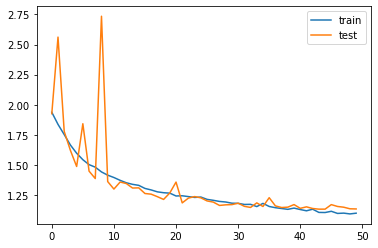

In [ ]:
_, train_acc = model.evaluate(train_data, verbose = 0)
_, test_acc = model.evaluate(test_data, verbose = 0)
print("Train Accuracy: %.3f, Test Accuracy: %.3f" % (train_acc, test_acc))
plt.plot(model_history.history['loss'], label = 'train')
plt.plot(model_history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()




base_model = tf.keras.applications.vgg16.VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

inputs = tf.keras.Input(shape=(224,224,3))
#x = tf.keras.layers.RandomFlip(mode='horizontal')(inputs)
#x = tf.keras.layers.RandomZoom(0.1)(x)
#x = tf.keras.layers.RandomRotation(0.1)(x)
#x = data_augmentation(inputs)                    
x = preprocess_input(inputs)     
x = tf.keras.layers.RandomFlip(mode='horizontal')(x)            
x = base_model(x, training=False)
#x = global_average_layer(x)  
      
      
#x = global_average_layer(x) 
x = layers.Flatten()(x)
#x = layers.Dense(1024, activation='relu',kernel_initializer='he_normal')(x)
#x = tf.keras.layers.Dropout(0.3)(x)
x = layers.Dense(1024, activation='relu', kernel_initializer='he_normal')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)     
outputs = layers.Dense(7, activation='softmax')(x)              

model = tf.keras.Model(inputs, outputs)


model.compile(optimizer = Adam(learning_rate = 1e-4), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
model_history = model.fit(train_data, validation_data=test_data, epochs = 50, verbose=1,
    use_multiprocessing=True)

In [ ]:
inputs = tf.keras.Input(shape=(48,48,3))

x = tf.keras.layers.Rescaling(1/255.0)(inputs)
x = tf.keras.layers.RandomFlip(mode='horizontal')(x)
x = tf.keras.layers.RandomRotation(0.15)(x)
x = tf.keras.layers.RandomZoom(0.15)(x)



x = tf.keras.layers.Conv2D(
    filters=64, kernel_size=(5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(
    filters=128, kernel_size=(5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(
    filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(
    filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

x = tf.keras.layers.Conv2D(
    filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
#x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)


x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)

x = layers.Dense(1024, activation='relu', kernel_initializer='he_normal')(x)

#x = layers.Dense(1024, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l1_l2')(x)
#x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)  

x = layers.Dense(512, activation='relu', kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dropout(0.4)(x) 


outputs = layers.Dense(7, activation='softmax')(x)              

model = tf.keras.Model(inputs, outputs)


model.compile(optimizer = Adam(learning_rate = 1e-4), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])


In [ ]:
model.summary()

Model: "model_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_74 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 rescaling_23 (Rescaling)    (None, 48, 48, 3)         0         
                                                                 
 random_flip_48 (RandomFlip)  (None, 48, 48, 3)        0         
                                                                 
 random_rotation_48 (RandomR  (None, 48, 48, 3)        0         
 otation)                                                        
                                                                 
 random_zoom_48 (RandomZoom)  (None, 48, 48, 3)        0         
                                                                 
 conv2d_96 (Conv2D)          (None, 48, 48, 64)        4864      
                                                          

In [ ]:
model_history = model.fit(train_data, validation_data=test_data, epochs = 50, verbose=1,
    use_multiprocessing=True)

Epoch 1/50
898/898 [==============================] - 26s 27ms/step - loss: 1.8234 - accuracy: 0.2454 - val_loss: 1.7986 - val_accuracy: 0.2536
Epoch 2/50
898/898 [==============================] - 24s 27ms/step - loss: 1.7897 - accuracy: 0.2586 - val_loss: 1.7412 - val_accuracy: 0.2792
Epoch 3/50
898/898 [==============================] - 24s 26ms/step - loss: 1.7376 - accuracy: 0.2841 - val_loss: 1.6853 - val_accuracy: 0.3111
Epoch 4/50
898/898 [==============================] - 24s 26ms/step - loss: 1.6798 - accuracy: 0.3195 - val_loss: 1.5890 - val_accuracy: 0.3745
Epoch 5/50
898/898 [==============================] - 24s 26ms/step - loss: 1.5924 - accuracy: 0.3711 - val_loss: 1.4541 - val_accuracy: 0.4478
Epoch 6/50
898/898 [==============================] - 24s 26ms/step - loss: 1.5098 - accuracy: 0.4078 - val_loss: 1.3977 - val_accuracy: 0.4546
Epoch 7/50
898/898 [==============================] - 24s 26ms/step - loss: 1.4504 - accuracy: 0.4366 - val_loss: 1.3873 - val_accuracy:

Train Accuracy: 0.706, Test Accuracy: 0.619


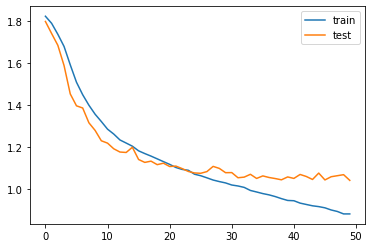

In [ ]:
_, train_acc = model.evaluate(train_data, verbose = 0)
_, test_acc = model.evaluate(test_data, verbose = 0)
print("Train Accuracy: %.3f, Test Accuracy: %.3f" % (train_acc, test_acc))
plt.plot(model_history.history['loss'], label = 'train')
plt.plot(model_history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

In [ ]:
print("Evaluate on test data")
results = model.evaluate(final_loader)
print("test loss, test acc:", results)

Evaluate on test data
1149/1149 [==============================] - 12s 11ms/step - loss: 1.1484 - accuracy: 0.6753
test loss, test acc: [1.1483782529830933, 0.6753308773040771]


In [ ]:
#model.save('G:/Meine Ablage/Phyton/CLA/CNN/FER_2013/model_50')
model.save('/content/drive/MyDrive/Phyton/CLA/CNN/FER_2013/model_50')

In [ ]:
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/Phyton/CLA/CNN/FER_2013/model_50")


In [ ]:
r = reconstructed_model.predict(final_loader)


1149/1149 [==============================] - 12s 10ms/step


In [ ]:
ex=[]
la = []
for images, labels in final_loader:
  la.append(labels)
  ex.append(images)


In [ ]:
pictures= ex[0][10:19]
labels = la[0][10:19]
images = pictures
predictions = model.predict(pictures)

1/1 [==============================] - 0s 23ms/step


In [ ]:


print(class_names)
print(labels)
for i in range(len(predictions)):
  #print(predictions[i].max())

  print(np.argmax(predictions[i]))

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
tf.Tensor([0 4 5 2 0 5 6 2 6], shape=(9,), dtype=int32)
4
4
5
2
0
5
6
5
6


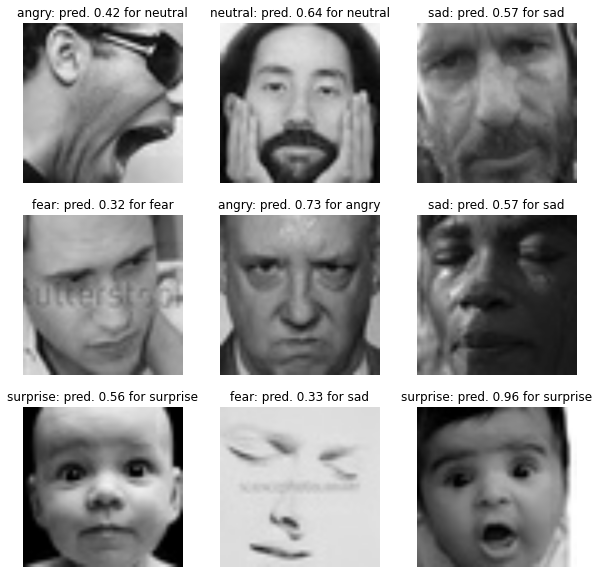

In [ ]:
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(images[i]/255.)
    age= labels[i]
    age= class_names[age]
    emo=np.argmax(predictions[i], axis=None)
    
    #prob = round(np.amax(predictions[i], axis=None),2)
    prob = round(float(predictions[i].max()),2)
    emo =int(np.where(predictions[i] == predictions[i].max())[0]) 
    
    group = class_names[emo]
    plt.title("{age}: pred. {prob} for {group}".format(age=age,prob=prob, group=group))
    plt.axis('off')

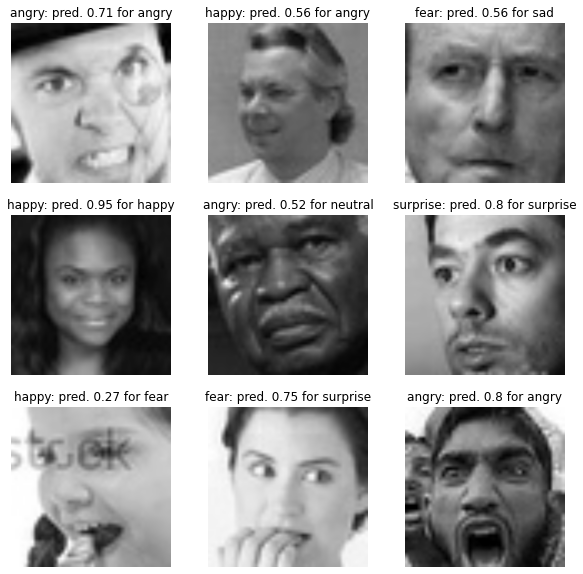

In [ ]:
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(images[i]/255.)
    age= labels[i]
    age= class_names[age]
    emo=np.argmax(predictions[i], axis=None)
    
    #prob = round(np.amax(predictions[i], axis=None),2)
    prob = round(float(predictions[i].max()),2)
    emo =int(np.where(predictions[i] == predictions[i].max())[0]) 
    
    group = class_names[emo]
    plt.title("{age}: pred. {prob} for {group}".format(age=age,prob=prob, group=group))
    plt.axis('off')

In [ ]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
#You can call .numpy() on the image_batch and labels_batch tensors to convert them to a numpy.ndarray.

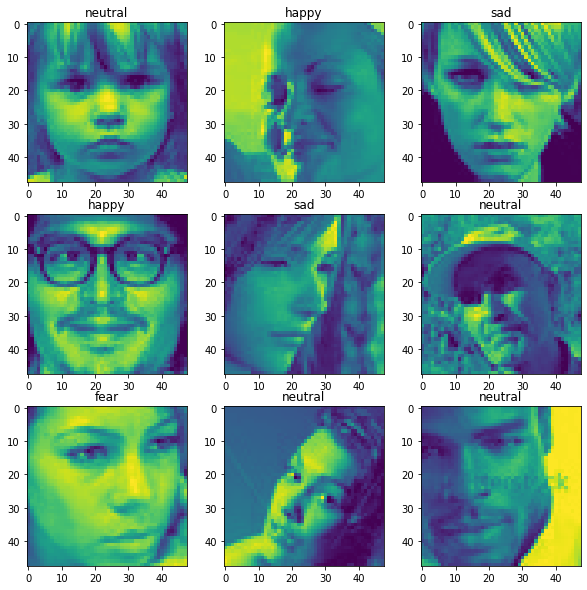

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(3):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("on")

In [ ]:
## manually agugmenting and transforming

IMG_SIZE = 224

transforms_general = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    #layers.RandomRotation(0.1),
    #layers.RandomCrop(74, 74)   
])

def prepare(ds, shuffle = False, augment = False):
  ds = ds.map(lambda x,y: (transforms_general(x),y))

  if shuffle:
    ds = ds.shuffle(1000)
  
  #ds = ds.batch(batch_size)

  result = ds

  if augment:
    augmented_ds = ds.map(lambda x,y: (data_augmentation(x),y),
          num_parallel_calls = tf.data.AUTOTUNE)
    result = augmented_ds.concatenate(ds)

  return result.prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
train_loader = prepare(train_data, shuffle = False, augment = True)
test_loader = prepare(val_data)
final_loader = prepare(test_data)


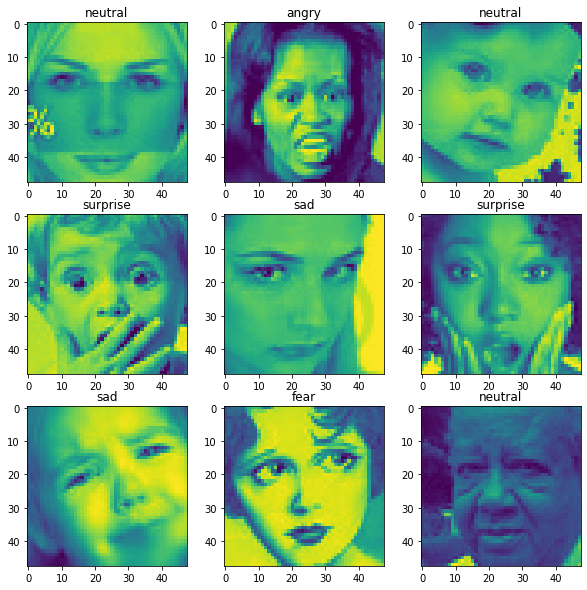

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_loader.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy())
    plt.title(class_names[labels[i]])
    plt.axis("on")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)
val_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_data_train = train_data.map(lambda x, y: (normalization_layer(x), y))
normalized_data_val = val_data.map(lambda x, y: (normalization_layer(x), y))
normalized_data_test = test_data.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
train_loader= normalized_data_train
test_loader = normalized_data_val
final_loader = normalized_data_test

In [ ]:
Resizing = layers.experimental.preprocessing.Resizing(224, 224)

In [ ]:
from tensorflow.keras.applications import VGG16


#pretrained_model=VGG16(input_shape = (244, 244, 3), 
                        #include_top = False, 
                        #weights = 'imagenet')

pretrained_model=VGG16(input_shape = (224, 224, 3), 
                        include_top = False, 
                        weights = 'imagenet')

for layer in pretrained_model.layers:
     layer.trainable = False

# pretrained_model.summary()
last_layer = pretrained_model.get_layer('block5_pool')
print('last layer of vgg : output shape: ', last_layer.output_shape)
last_output= last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(10, activation='relu')(x)
x = layers.Dropout(0.3)(x)                  
x = layers.Dense(7, activation='softmax')(x)           

model_vgg = Model(pretrained_model.input, x) 


model_vgg.compile(optimizer = Adam(learning_rate = 1e-4), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

last layer of vgg : output shape:  (None, 7, 7, 512)


In [ ]:
model_vgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:

print("Generate predictions for 9 samples")
prediction = model_vgg.predict(final_loader.take(1))
predictions = prediction[:9]
print("predictions shape:", predictions.shape)


Generate predictions for 9 samples
1/1 [==============================] - 1s 757ms/step
predictions shape: (9, 7)


In [ ]:
image_batch, labels_batch = next(iter(final_loader.take(1)))
images = image_batch.numpy()[:9]
labels = labels_batch.numpy()[:9]
print(images.shape)
print(labels.shape)

(9, 48, 48, 3)
(9,)


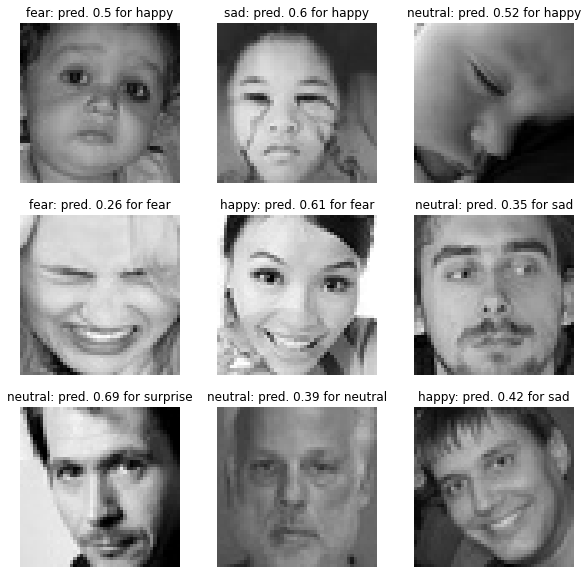

In [ ]:
plt.figure(figsize=(10,10))

for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(images[i])
    age= np.array(labels)[i]
    age= class_names[age]
    prob = round(float(predictions[i].max()),2)
    emo =int(np.where(predictions[i] == predictions[i].max())[0])    
    group = class_names[emo]
    plt.title("{age}: pred. {prob} for {group}".format(age=age,prob=prob, group=group))
    plt.axis('off')

In [ ]:
model=Sequential([
    
    Conv2D(32,5, padding = 'same', activation = 'relu', input_shape = (48,48,3)),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(64,5, padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(64,5, padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(units = 1024, activation = 'ReLU'),
    Dropout(0.3),
    Dense(units = 7, activation = 'softmax')
])

model.compile(optimizer = Adam(learning_rate = 1e-4), 
              loss = SparseCategoricalCrossentropy(), 
              metrics = ["accuracy"])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        102464    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)        